In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:

df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [7]:
df.shape

(50000, 8)

In [8]:
df.drop(['unique_id'],axis=1,inplace=True)

In [9]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
# Finding distance auto travelled
from math import radians, cos,sin, asin,sqrt

def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))

In [12]:
d = []
for i in range(df.shape[0]):
    d.append(distance(df["latitude_of_pickup"][i],
                      df["latitude_of_dropoff"][i],
                      df["longitude_of_pickup"][i],
                      df["longitude_of_dropoff"][i]))

In [13]:
d

[0.41,
 4.63,
 1.0,
 0.91,
 1.36,
 3.23,
 0.8,
 4.37,
 1.5,
 1.42,
 1.74,
 0.0,
 0.95,
 0.68,
 0.62,
 0.0,
 0.77,
 1.49,
 1.2,
 0.12,
 0.89,
 0.73,
 0.73,
 1.57,
 1.28,
 1.74,
 0.0,
 0.28,
 1.97,
 0.23,
 0.6,
 3.26,
 12.4,
 1.55,
 2.06,
 6.5,
 0.54,
 1.14,
 2.2,
 1.04,
 0.54,
 3.29,
 3.63,
 3.58,
 1.21,
 1.02,
 1.15,
 0.38,
 0.37,
 1.05,
 1.45,
 0.29,
 0.63,
 0.22,
 5.37,
 1.44,
 12.52,
 2.2,
 3.72,
 0.47,
 0.45,
 0.77,
 0.53,
 1.65,
 1.39,
 1.48,
 0.69,
 3.22,
 2.91,
 1.1,
 1.03,
 0.54,
 0.96,
 1.3,
 3.73,
 0.95,
 1.62,
 9.43,
 1.58,
 1.0,
 1.75,
 0.46,
 0.55,
 4.53,
 1.62,
 2.18,
 6.29,
 1.52,
 1.84,
 0.77,
 2.13,
 1.89,
 2.46,
 1.15,
 2.0,
 3.77,
 0.41,
 1.78,
 4.27,
 0.65,
 1.1,
 1.53,
 2.67,
 4.27,
 0.99,
 0.0,
 3.76,
 1.39,
 1.62,
 0.49,
 1.52,
 1.81,
 2.32,
 1.95,
 2.26,
 0.72,
 1.28,
 0.17,
 10.87,
 0.65,
 3.8,
 0.67,
 3.01,
 7.31,
 0.0,
 1.15,
 6.22,
 1.29,
 2.39,
 1.05,
 1.67,
 2.53,
 21.03,
 2.63,
 7.92,
 3.84,
 0.88,
 0.76,
 1.21,
 5.08,
 0.94,
 2.66,
 3.35,
 1.51,
 1.41,
 

In [14]:
df['Distance']=d

In [15]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [16]:
df.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'Distance'],
      dtype='object')

In [17]:
df.drop(['longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'],axis=1,inplace=True)

In [18]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,Distance
0,4.5,2009-06-15 17:26:21 UTC,1,0.41
1,16.9,2010-01-05 16:52:16 UTC,1,4.63
2,5.7,2011-08-18 00:35:00 UTC,2,1.00
3,7.7,2012-04-21 04:30:42 UTC,1,0.91
4,5.3,2010-03-09 07:51:00 UTC,1,1.36


In [19]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])

In [20]:
print("Date in data : ", df["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in data : ", df["date_time_of_pickup"].dt.month.sort_values().unique())
print("Year in data : ", df["date_time_of_pickup"].dt.year.sort_values().unique())

Date in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Year in data :  [2009 2010 2011 2012 2013 2014 2015]


In [21]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["weekday_name"] = df["date_time_of_pickup"].dt.weekday.map(week_names)

In [22]:
df

,amount,date_time_of_pickup,no_of_passenger,Distance,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday
...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1,2.29,Tuesday
49996,7.5,2015-06-22 17:19:18+00:00,1,0.37,Sunday
49997,6.9,2011-01-30 04:53:00+00:00,1,0.80,Saturday
49998,4.5,2012-11-06 07:09:00+00:00,2,0.82,Monday


In [23]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}
df["weekday_name"] = df["weekday_name"].map(week_names_encode)

In [24]:
df

,amount,date_time_of_pickup,no_of_passenger,Distance,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3
...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1,2.29,4
49996,7.5,2015-06-22 17:19:18+00:00,1,0.37,1
49997,6.9,2011-01-30 04:53:00+00:00,1,0.80,2
49998,4.5,2012-11-06 07:09:00+00:00,2,0.82,3


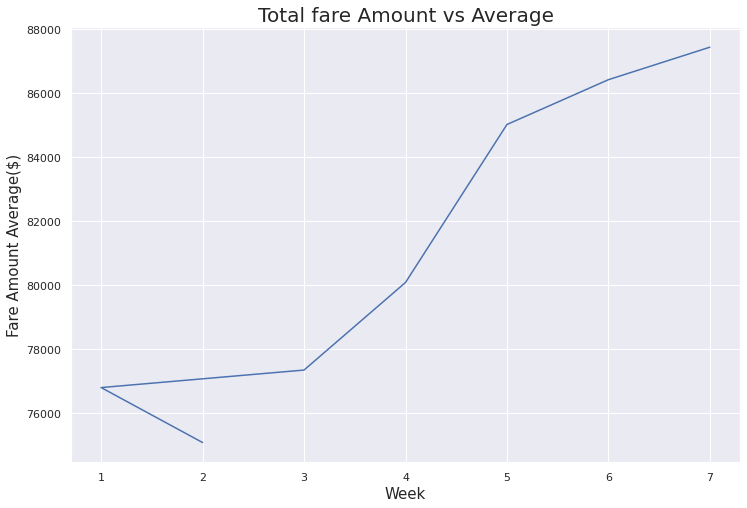

In [25]:
plt.figure(figsize = (12,8))
df.groupby("weekday_name")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [26]:
df["Hour"] = df["date_time_of_pickup"].dt.hour

In [27]:
df["Hour"].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5])

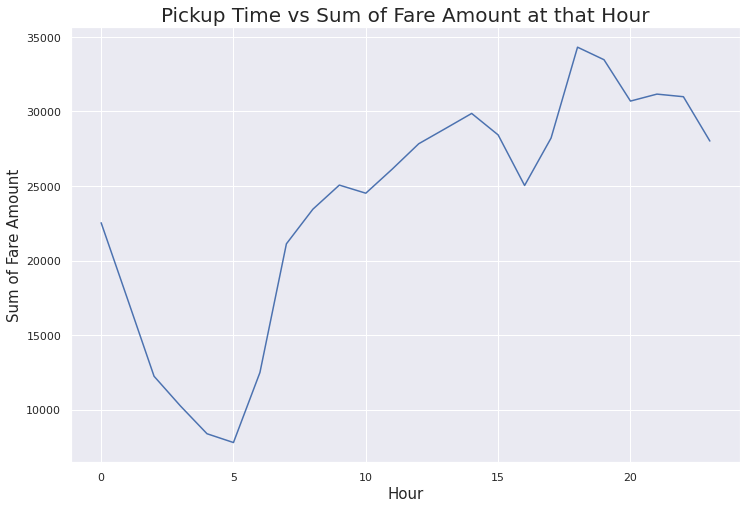

In [28]:
# Plotting graph of Fare vs Pickup time
plt.figure(figsize = (12,8))

df.groupby("Hour")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [29]:
df["Month_Day"] = df["date_time_of_pickup"].dt.day

In [30]:
# Sum of Taxi Fare in a particular day

for day in list(df["date_time_of_pickup"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(df[df.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")

Date : 1 	 Total fare Amount : $17229.03
Date : 2 	 Total fare Amount : $17711.51
Date : 3 	 Total fare Amount : $17887.56
Date : 4 	 Total fare Amount : $16871.76
Date : 5 	 Total fare Amount : $18426.86
Date : 6 	 Total fare Amount : $18898.4
Date : 7 	 Total fare Amount : $19953.12
Date : 8 	 Total fare Amount : $19773.47
Date : 9 	 Total fare Amount : $19096.83
Date : 10 	 Total fare Amount : $19103.29
Date : 11 	 Total fare Amount : $18543.99
Date : 12 	 Total fare Amount : $20143.27
Date : 13 	 Total fare Amount : $19773.21
Date : 14 	 Total fare Amount : $18941.62
Date : 15 	 Total fare Amount : $19425.37
Date : 16 	 Total fare Amount : $19864.5
Date : 17 	 Total fare Amount : $19498.61
Date : 18 	 Total fare Amount : $19117.84
Date : 19 	 Total fare Amount : $19866.99
Date : 20 	 Total fare Amount : $18862.46
Date : 21 	 Total fare Amount : $20123.13
Date : 22 	 Total fare Amount : $18670.33
Date : 23 	 Total fare Amount : $18803.67
Date : 24 	 Total fare Amount : $18053.6
Date

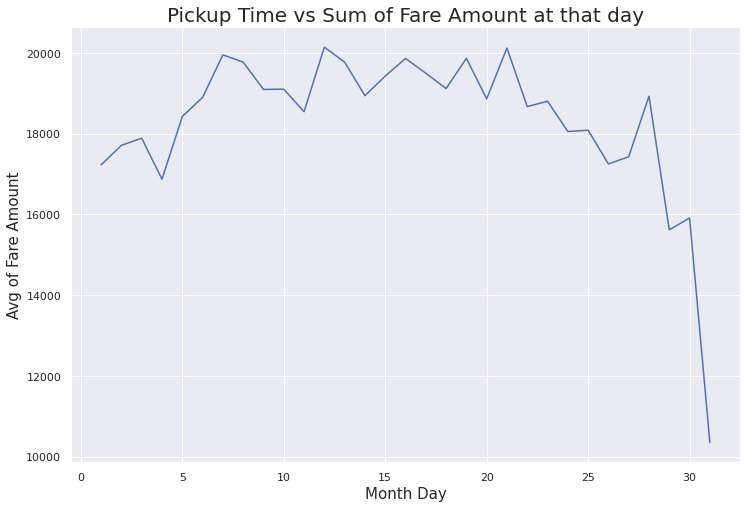

In [31]:
plt.figure(figsize = (12, 8))

df.groupby("Month_Day")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [32]:
df

,amount,date_time_of_pickup,no_of_passenger,Distance,weekday_name,Hour,Month_Day
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1,2.29,4,23,12
49996,7.5,2015-06-22 17:19:18+00:00,1,0.37,1,17,22
49997,6.9,2011-01-30 04:53:00+00:00,1,0.80,2,4,30
49998,4.5,2012-11-06 07:09:00+00:00,2,0.82,3,7,6


In [33]:
df['no_of_passenger'].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

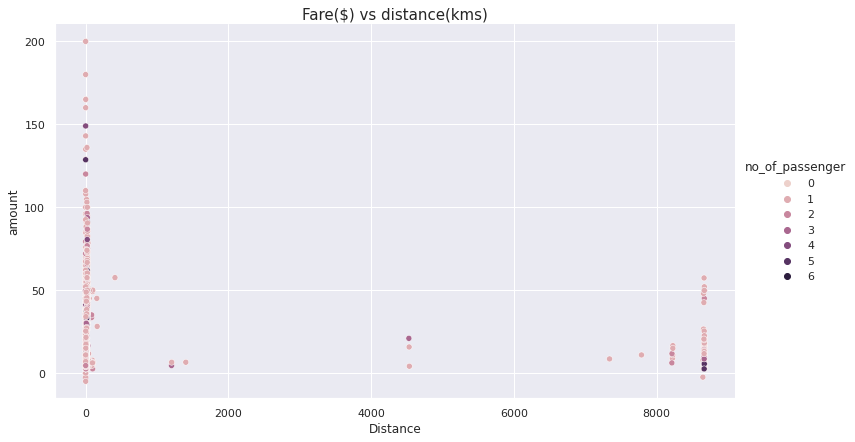

In [34]:
## Graph - Fare vs Distance

sns.relplot(data = df, kind = "scatter",x = "Distance",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

In [35]:
df['fare_class']=df['amount']>=10

In [36]:
df

,amount,date_time_of_pickup,no_of_passenger,Distance,weekday_name,Hour,Month_Day,fare_class
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15,False
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5,True
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18,False
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21,False
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9,False
...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1,2.29,4,23,12,True
49996,7.5,2015-06-22 17:19:18+00:00,1,0.37,1,17,22,False
49997,6.9,2011-01-30 04:53:00+00:00,1,0.80,2,4,30,False
49998,4.5,2012-11-06 07:09:00+00:00,2,0.82,3,7,6,False


In [37]:
mp={False:0,True:1}
df['fare_class']=df['fare_class'].map(mp)

In [38]:
df['fare_class'].value_counts()

0    30442
1    19558
Name: fare_class, dtype: int64

In [39]:
# Total passenger travelling in a Taxi, paying Fare amount less than or more than $10.

df.groupby(["fare_class","no_of_passenger"])[["no_of_passenger"]].sum()

no_of_passenger
fare_class no_of_passenger                 
0          0                              0
           1                          21366
           2                           8740
           3                           3963
           4                           2468
           5                          10600
           6                           3204
1          0                              0
           1                          13442
           2                           6032
           3                           2586
           4                           1596
           5                           6665
           6                           2730

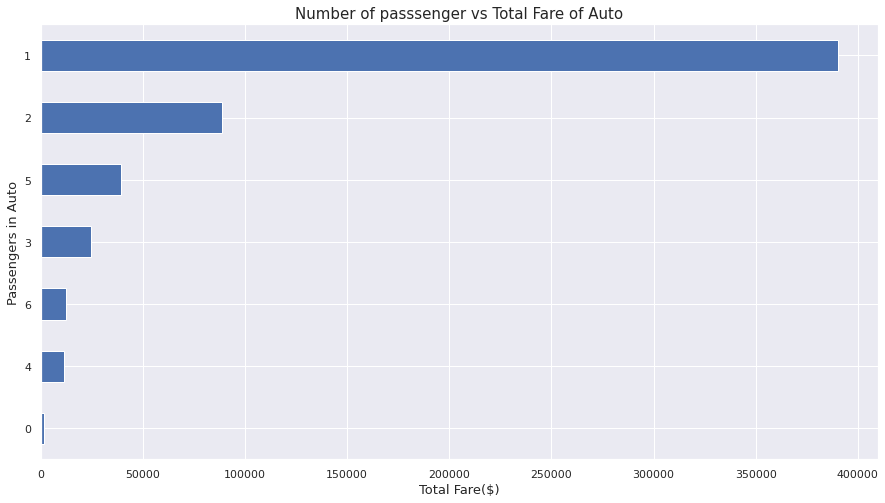

In [40]:
plt.figure(figsize=(15,8))
df.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Auto", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Auto", fontsize = 15)
plt.show()
# Here we have found relation between passengers in auto and total fare of auto

In [41]:
df

,amount,date_time_of_pickup,no_of_passenger,Distance,weekday_name,Hour,Month_Day,fare_class
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17,15,0
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16,5,1
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0,18,0
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4,21,0
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7,9,0
...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,1,2.29,4,23,12,1
49996,7.5,2015-06-22 17:19:18+00:00,1,0.37,1,17,22,0
49997,6.9,2011-01-30 04:53:00+00:00,1,0.80,2,4,30,0
49998,4.5,2012-11-06 07:09:00+00:00,2,0.82,3,7,6,0


In [42]:
df.drop(['date_time_of_pickup'],axis=1,inplace=True)

In [43]:
# Separating dependent and independent feature
#### Dependent Feature ---> fare_amount

X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [44]:
X

,no_of_passenger,Distance,weekday_name,Hour,Month_Day,fare_class
0,1,0.41,1,17,15,0
1,1,4.63,3,16,5,1
2,2,1.00,6,0,18,0
3,1,0.91,5,4,21,0
4,1,1.36,3,7,9,0
...,...,...,...,...,...,...
49995,1,2.29,4,23,12,1
49996,1,0.37,1,17,22,0
49997,1,0.80,2,4,30,0
49998,2,0.82,3,7,6,0


In [45]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: amount, Length: 50000, dtype: float64

In [46]:
df1=df

In [47]:
df1

,amount,no_of_passenger,Distance,weekday_name,Hour,Month_Day,fare_class
0,4.5,1,0.41,1,17,15,0
1,16.9,1,4.63,3,16,5,1
2,5.7,2,1.00,6,0,18,0
3,7.7,1,0.91,5,4,21,0
4,5.3,1,1.36,3,7,9,0
...,...,...,...,...,...,...,...
49995,15.0,1,2.29,4,23,12,1
49996,7.5,1,0.37,1,17,22,0
49997,6.9,1,0.80,2,4,30,0
49998,4.5,2,0.82,3,7,6,0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33,random_state=42)


In [50]:
linreg = LinearRegression(fit_intercept= True, normalize =True)
linreg.fit(X_train , y_train)

LinearRegression(normalize=True)

In [51]:
y_pred = linreg.predict(X_test)

In [52]:
r2_score(y_test , y_pred)
# Such a low score shows the data given is not linear

0.3868746706662113

In [53]:
linreg.score(X_train , y_train)

0.39191055741088565

In [54]:
linreg.score(X_test , y_test)


0.3868746706662113

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rfreg = RandomForestRegressor(n_estimators = 50)
rfreg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [57]:
predict = rfreg.predict(X_test)

In [58]:
r2_score(y_test,predict)
# High score predicts this the best model uptil now

0.7197256747974183

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=None, random_state=42)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', random_state=42)

In [61]:
pred = dt_reg.predict(X_test)

In [62]:
r2_score(y_test, pred)

0.5032241551060593

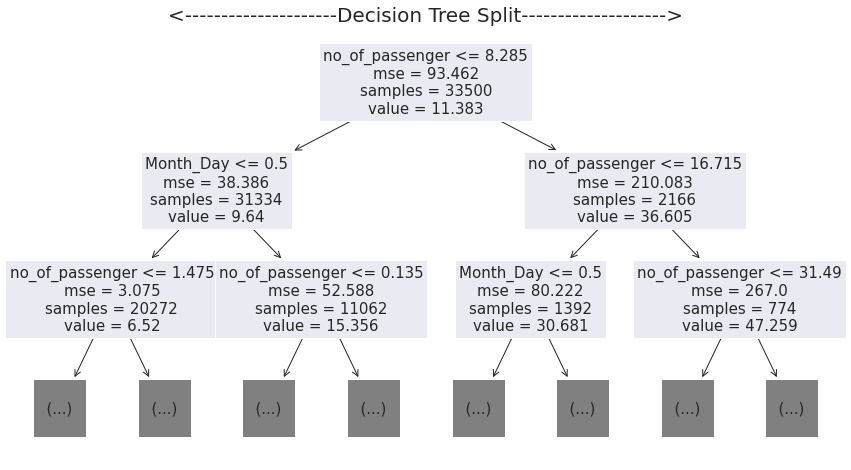

In [63]:
# Decision plot
from sklearn import tree
plt.figure(figsize = (15,8))
tree.plot_tree(dt_reg, max_depth = 2, fontsize = 15, feature_names=df.columns)
plt.title("<---------------------Decision Tree Split-------------------->", fontsize = 20)
plt.show()

In [64]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(learning_rate= 0.30, max_depth=6, n_estimators=100, n_jobs =0)
xgb_reg.fit(X_train,y_train)

[16:55:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.3, max_depth=6, n_jobs=0)

In [65]:
y_pred = xgb_reg.predict(X_test)

In [66]:
r2_score(y_pred, y_test)

0.6556126654155897

In [67]:
# Comparing all the model and r2_scores shows RandomForestRegressor to be best uptil now